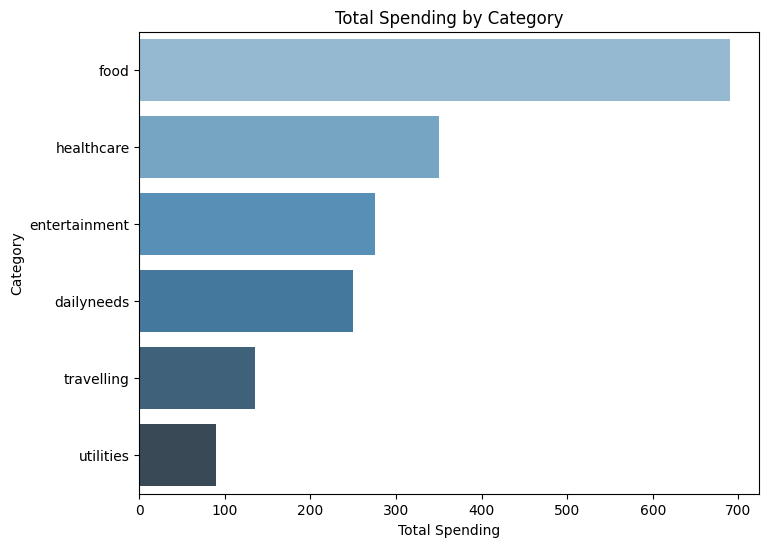

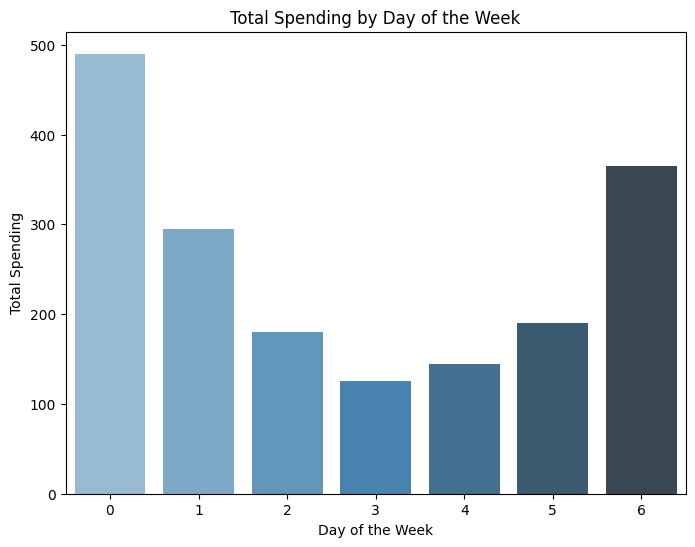

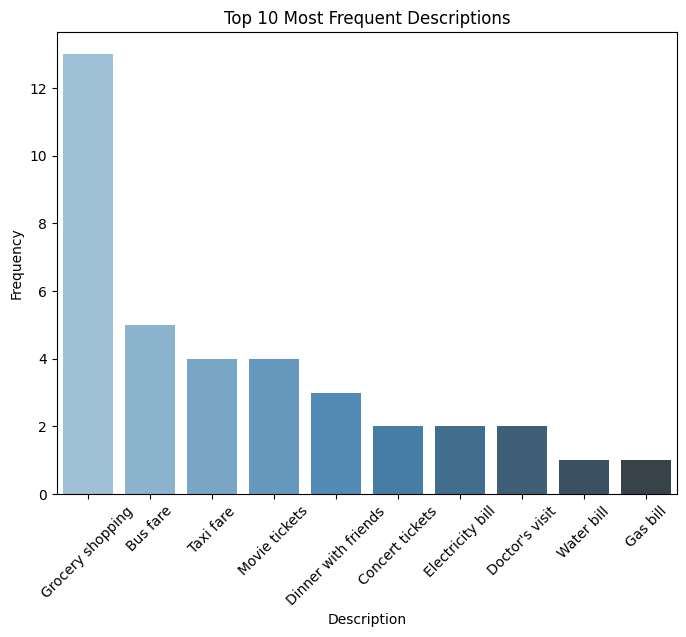

T-test results: t = 1.75, p = 0.0877
There is no significant difference in spending between weekdays and weekends


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Load the data
spending_data = pd.read_csv('spending.csv')

# Clean the data
spending_data = spending_data.dropna()
spending_data['date'] = pd.to_datetime(spending_data['date'], format='%d-%m-%Y')


# Analyze spending by category
category_spending = spending_data.groupby('category')['amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=category_spending.values, y=category_spending.index, palette='Blues_d')
plt.title('Total Spending by Category')
plt.xlabel('Total Spending')
plt.ylabel('Category')
plt.show()



# Analyze spending by day of the week
spending_data['Day_of_week'] = spending_data['date'].dt.dayofweek
day_of_week_spending = spending_data.groupby('Day_of_week')['amount'].sum()
plt.figure(figsize=(8,6))
sns.barplot(x=day_of_week_spending.index, y=day_of_week_spending.values, palette='Blues_d')
plt.title('Total Spending by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Spending')
plt.show()

# Analyze spending by description
top_descriptions = spending_data['description'].value_counts().head(10)
plt.figure(figsize=(8,6))
sns.barplot(x=top_descriptions.index, y=top_descriptions.values, palette='Blues_d')
plt.title('Top 10 Most Frequent Descriptions')
plt.xlabel('Description')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Conduct a t-test to compare spending on weekdays vs weekends
weekday_spending = spending_data.loc[spending_data['Day_of_week'] < 5]['amount']
weekend_spending = spending_data.loc[spending_data['Day_of_week'] >= 5]['amount']
t, p = ttest_ind(weekday_spending, weekend_spending, equal_var=False)
print('T-test results: t = {:.2f}, p = {:.4f}'.format(t, p))
if p < 0.05:
    print('There is a significant difference in spending between weekdays and weekends.')
else:
    print('There is no significant difference in spending between weekdays and weekends')


C:\Users\rajva\AppData\Local\Temp\ipykernel_27080\3196634741.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='category', y='amount', data=spending_data, estimator=sum, ci=None)


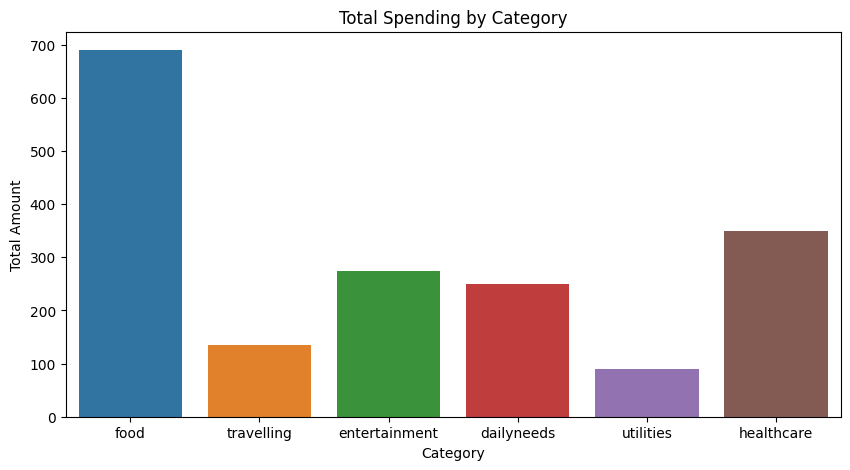

C:\Users\rajva\AppData\Local\Temp\ipykernel_27080\3196634741.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='month_year', y='amount', data=spending_data, estimator=sum, ci=None)


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "pandas\_libs\lib.pyx", line 2369, in pandas._libs.lib.maybe_convert_numeric
TypeError: Invalid object type

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\rajva\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\rajva\AppData\Local\Temp\ipykernel_27080\3196634741.py", line 25, in <module>
    sns.lineplot(x='month_year', y='amount', data=spending_data, estimator=sum, ci=None)
  File "c:\Users\rajva\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\relational.py", line 645, in lineplot
    p.plot(ax, kwargs)
  File "c:\Users\rajva\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\relational.py", line 423, in plot
    for sub_vars, sub_data in self.iter_data(grouping_vars, from_comp_data=True):
  File "c:\Users\rajva\A

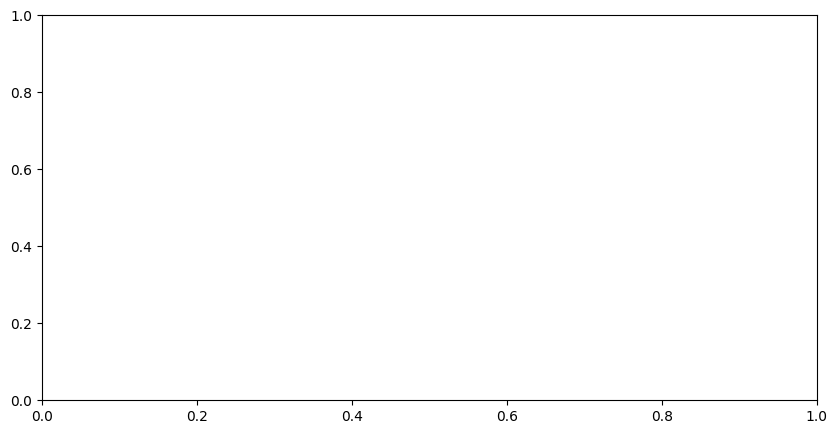

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
spending_data = pd.read_csv('spending.csv')

# Clean the data
spending_data = spending_data.dropna()
spending_data['date'] = pd.to_datetime(spending_data['date'], format='%d-%m-%Y')

# Create a new column for month and year
spending_data['month_year'] = spending_data['date'].dt.to_period('M')

# Bar plot of total spending by category
plt.figure(figsize=(10,5))
sns.barplot(x='category', y='amount', data=spending_data, estimator=sum, ci=None)
plt.title('Total Spending by Category')
plt.xlabel('Category')
plt.ylabel('Total Amount')
plt.show()

# Line plot of monthly spending over time
plt.figure(figsize=(10,5))
sns.lineplot(x='month_year', y='amount', data=spending_data, estimator=sum, ci=None)
plt.title('Monthly Spending Over Time')
plt.xlabel('Month and Year')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

# Pie chart of spending by category
plt.figure(figsize=(10,5))
spending_by_category = spending_data.groupby('category').sum().reset_index()
plt.pie(spending_by_category['amount'], labels=spending_by_category['category'], autopct='%1.1f%%')
plt.title('Spending by Category')
plt.show()

# Heatmap of spending by month and category
plt.figure(figsize=(10,5))
spending_by_month_category = pd.pivot_table(spending_data, values='amount', index='month_year', columns='category', aggfunc=sum)
sns.heatmap(spending_by_month_category, cmap="YlGnBu", annot=True, fmt=".1f", linewidths=.5)
plt.title('Spending by Month and Category')
plt.xlabel('Category')
plt.ylabel('Month and Year')
plt.show()

# Box plot of spending by category
plt.figure(figsize=(10,5))
sns.boxplot(x='category', y='amount', data=spending_data)
plt.title('Spending by Category')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.show()
